# Diabetes Prediction - Logistic Regression

* If Outcome is 1,then person have Diabetes.
* If Outcome is 0,then person Don't have Diabetes.

### Importing Libraries

In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

### Loading Data

In [8]:
data = pd.read_csv("../input/diabetes-dataset/diabetes2.csv")

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Plotting Data - Visualization

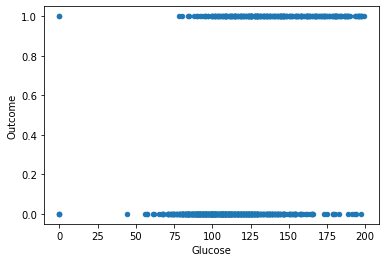

In [10]:
data.plot.scatter(x='Glucose',y='Outcome')

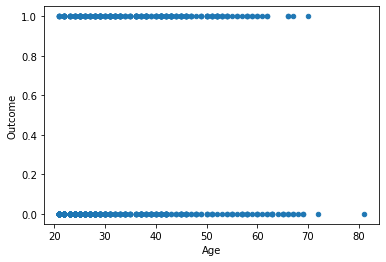

In [11]:
data.plot.scatter(x='Age',y='Outcome')

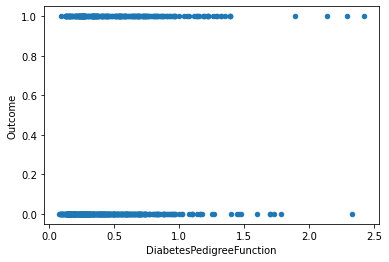

In [13]:
data.plot.scatter(x='DiabetesPedigreeFunction',y='Outcome')

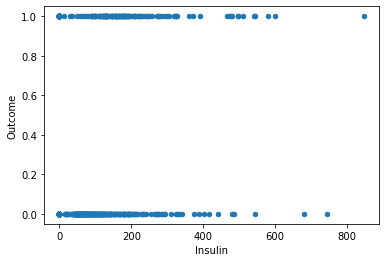

In [14]:
data.plot.scatter(x='Insulin',y='Outcome')

### Model

In [32]:
import statsmodels.api as sm
y= data['Outcome']

X = sm.add_constant(data[['Age','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']])

logit_model=sm.Logit(y,X)

result=logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.2718
Time:                        08:36:42   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### Prediction and Accuracy

In [34]:
y_pred = logreg.predict(X)

print('Accuracy of logistic regression classifier on test set is : {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.78


### Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y, y_pred)

print(confusion_matrix)

[[445  55]
 [116 152]]


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.57      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



### ROC curve

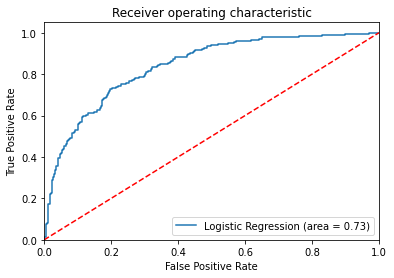

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### I hope you liked my notebook.